**Step 1: Import libraries and load the dataset**

In [18]:
# Step 1: Import libraries and load the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

# Explore basic info
print(df.head())
print(df.info())
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

**Step 2: Handle Missing Values**

In [19]:
# Fill missing numerical values with the mean or median
for column in df.select_dtypes(include=[np.number]):
    df[column] = df[column].fillna(df[column].mean())  # or use median()

# Fill missing categorical values with mode
for column in df.select_dtypes(include=[object]):
    df[column] = df[column].fillna(df[column].mode()[0])

# Check for missing values again to confirm they are filled
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [20]:
# Check for missing values again to confirm they are filled
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


**Step 3: Convert Categorical to Numerical (Encoding)**

In [21]:
# One-hot encoding for nominal categorical features
df = pd.get_dummies(df, drop_first=True)

# Alternatively, for ordinal data, you can use Label Encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['column_name'] = le.fit_transform(df['column_name'])


**Step 4: Normalize or Standardize Numerical Features**

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


**Step 5: Visualize and Remove Outliers with Boxplots**

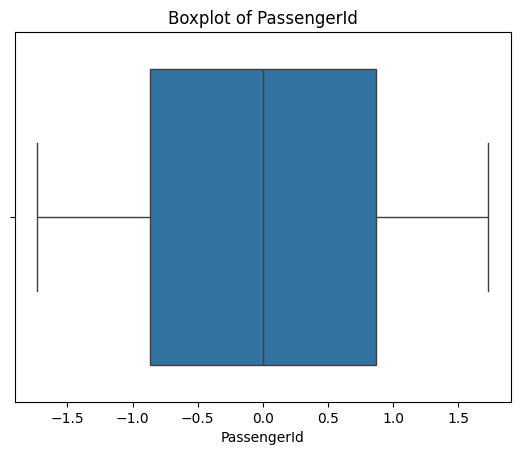

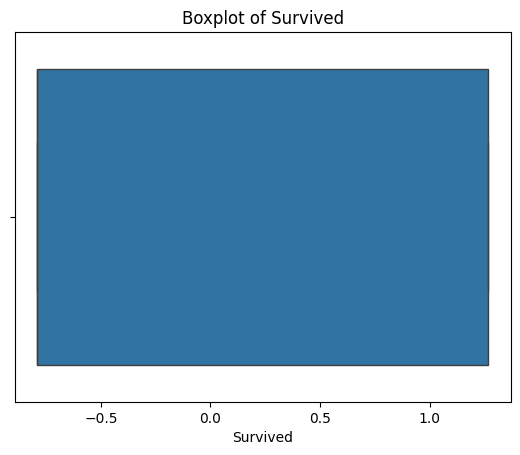

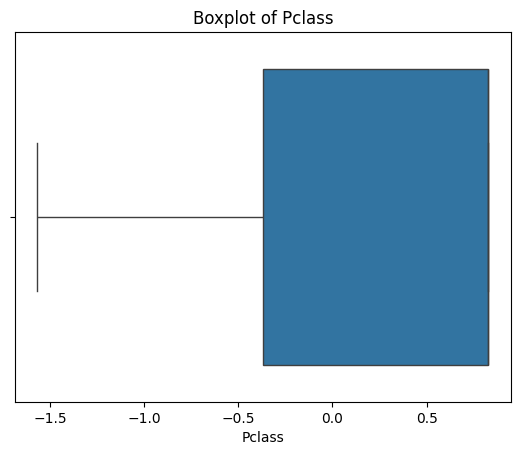

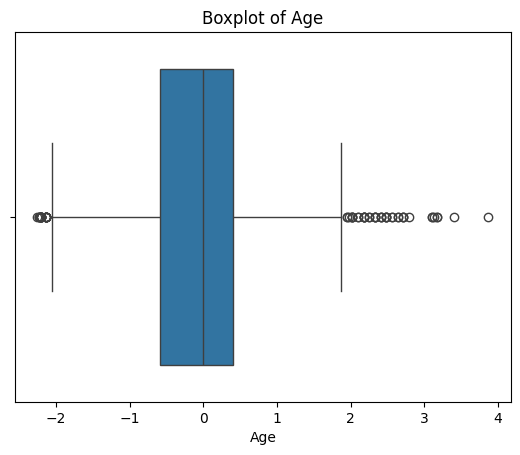

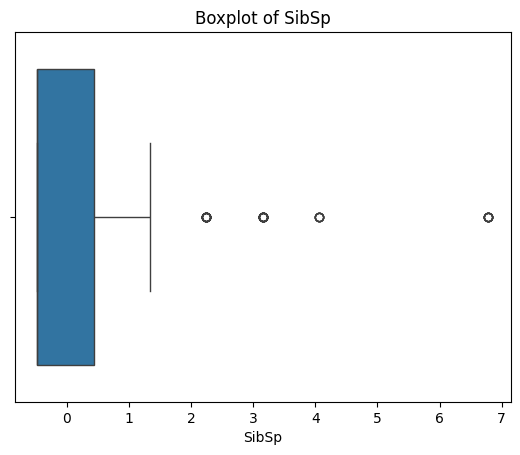

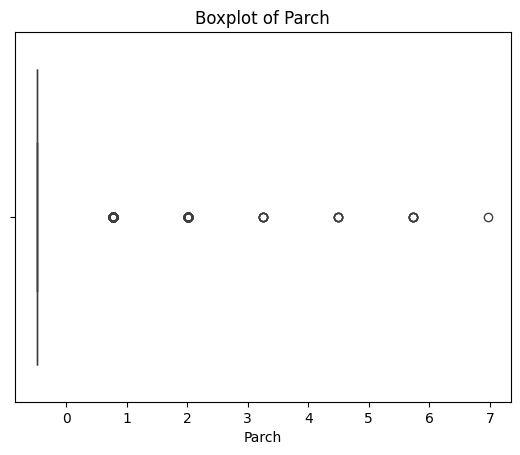

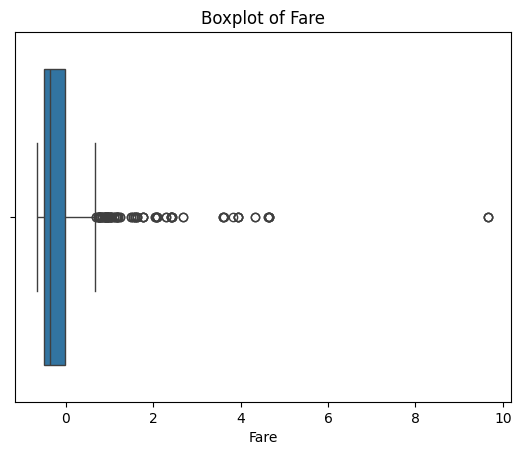

Shape before outlier removal: (891, 1726)
Shape after outlier removal: (577, 1726)


In [23]:
# Boxplot for each numerical feature
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers using IQR method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_cleaned.shape)


**Readme**

# 🧹 Data Cleaning & Preprocessing - ML Project

**Objective:** Clean and prepare raw data for machine learning.

## Steps:
1. **Import & Explore Data**  
   Load CSV, check structure, summary, and missing values.

2. **Handle Missing Values**  
   - Numeric: Filled with mean  
   - Categorical: Filled with mode

3. **Encode Categorical Features**  
   One-hot encoding using `pd.get_dummies()`.

4. **Normalize Numerical Features**  
   Standardized using `StandardScaler`.

5. **Visualize and Remove Outliers**  
   - Boxplots for features like `Fare`  
   - Remove outliers using the IQR method

## Output:
A cleaned dataset ready for machine learning (`df_cleaned`).

